In [4]:
# importanto bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# importando as tabelas a serem tratadas / usadas
order_items = pd.read_csv('olist_order_items_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')

# Questão a ser Respondida
Quais são as categorias com maior e menor receita nos ultimos 12 meses

In [ ]:
# unindo os datasets que serao usados
order_items = pd.merge(order_items, orders[['order_id', 'order_purchase_timestamp']], on='order_id', how='left')
order_items.head(1)

In [9]:
# convertendo para o tipo dateTime
order_items['order_purchase_timestamp'] = pd.to_datetime(order_items['order_purchase_timestamp'])

In [10]:
# achando a data maxima do data set
data_maxima = order_items['order_purchase_timestamp'].max()
data_maxima

Timestamp('2018-09-03 09:06:57')

In [11]:
# achando a data minima do data set
data_minima = data_maxima - pd.DateOffset(months=12)
data_minima

Timestamp('2017-09-03 09:06:57')

In [ ]:
# ordenando os intens dos ultimos 12 meses
order_items_ultimo_ano = order_items[order_items['order_purchase_timestamp'] >= data_minima]
order_items_ultimo_ano.head(1)

In [ ]:
# adicionando uma coluna para armezenar a receita dos produtos
order_items_ultimo_ano['receita'] = order_items_ultimo_ano['price'] * order_items_ultimo_ano['order_item_id']

In [ ]:
order_items_ultimo_ano.head(1)

In [16]:
# unindo com a tabela de categoria de produtos para indentificar a categoria
order_items_categorias = pd.merge(order_items_ultimo_ano, products[['product_id', 'product_category_name']], on='product_id', how='left')

In [17]:
# agrupando o nome da categoria com a suas devidas receitas
receita_por_categoria = order_items_categorias.groupby('product_category_name')['receita'].sum().reset_index()

In [18]:
# ordernando em ordem decrecente
receita_por_categoria = receita_por_categoria.sort_values(by='receita', ascending=False)

In [19]:
num_categorias = 5

In [20]:
top_categorias = receita_por_categoria.nlargest(num_categorias, 'receita')

In [21]:
menores_categorias = receita_por_categoria.nsmallest(num_categorias, 'receita')

In [22]:
top_categorias

,product_category_name,receita
11,beleza_saude,1079452.13
66,relogios_presentes,1033528.56
13,cama_mesa_banho,929791.16
44,informatica_acessorios,860732.01
32,esporte_lazer,824435.30


In [23]:
menores_categorias

,product_category_name,receita
67,seguros_e_servicos,100.00
37,fashion_roupa_infanto_juvenil,299.95
15,casa_conforto_2,357.49
17,cds_dvds_musicais,370.00
46,la_cuisine,1195.00


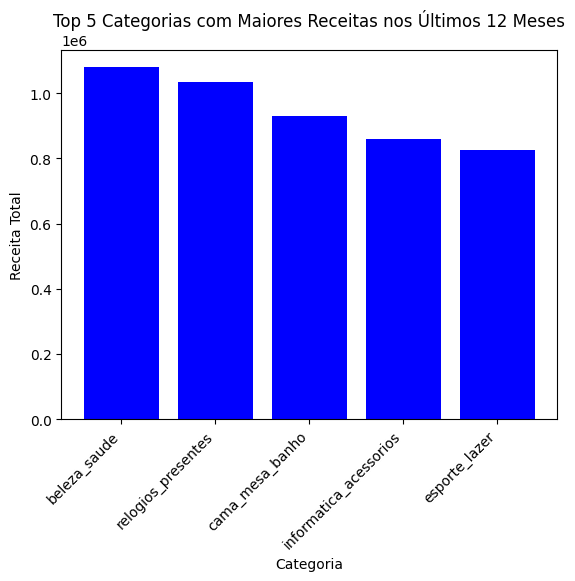

In [ ]:

plt.bar(top_categorias['product_category_name'], top_categorias['receita'], color='blue')
plt.title('Top 5 Categorias com Maiores Receitas nos Últimos 12 Meses')
plt.xlabel('Categoria')
plt.ylabel('Receita Total')
plt.xticks(rotation=45, ha='right')
plt.show()

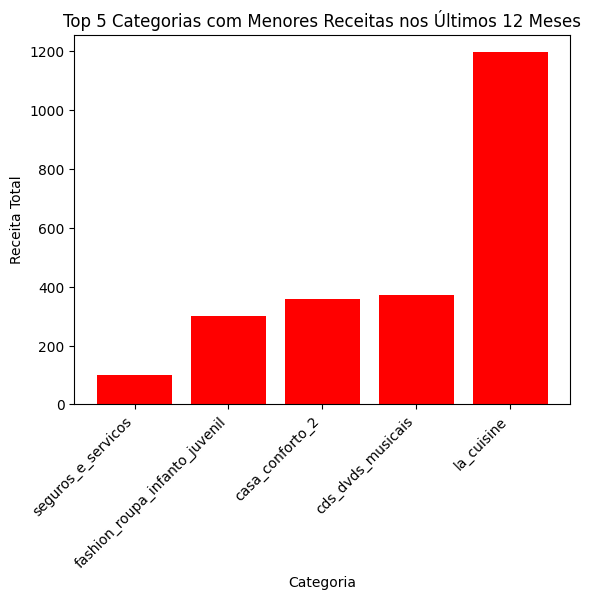

In [ ]:

plt.bar(range(len(menores_categorias)), menores_categorias['receita'], color='red')
plt.xticks(range(len(menores_categorias)), menores_categorias['product_category_name'], rotation=45, ha='right')
plt.title('Top 5 Categorias com Menores Receitas nos Últimos 12 Meses')
plt.xlabel('Categoria')
plt.ylabel('Receita Total')
plt.show()

# Questão a ser Respondida
10 melhores e piores vendedores (com maior e menor receitas)

In [ ]:
order_info = pd.merge(order_items, order_payments[['order_id', 'payment_value']], on='order_id', how='inner')
order_info.head(1)

In [ ]:
# Calcular a receita total para cada venda
order_info['total_receita'] = order_info['price'] + order_info['payment_value']
order_info.head(1)

In [ ]:
# agrupar os dados pelo vendedores e calculando a receita total para cada id de vendedor
seller_receita = order_info.groupby('seller_id')['total_receita'].sum().reset_index()
seller_receita.head(1)

In [ ]:
# classificando com base na receita
seller_revenue_sorted = seller_receita.sort_values(by='total_receita', ascending=False)

In [ ]:
top_10_sellers = seller_revenue_sorted.head(10)

In [ ]:
pior_10_sellers = seller_revenue_sorted.tail(10)

In [ ]:
top_10_sellers

In [ ]:
pior_10_sellers

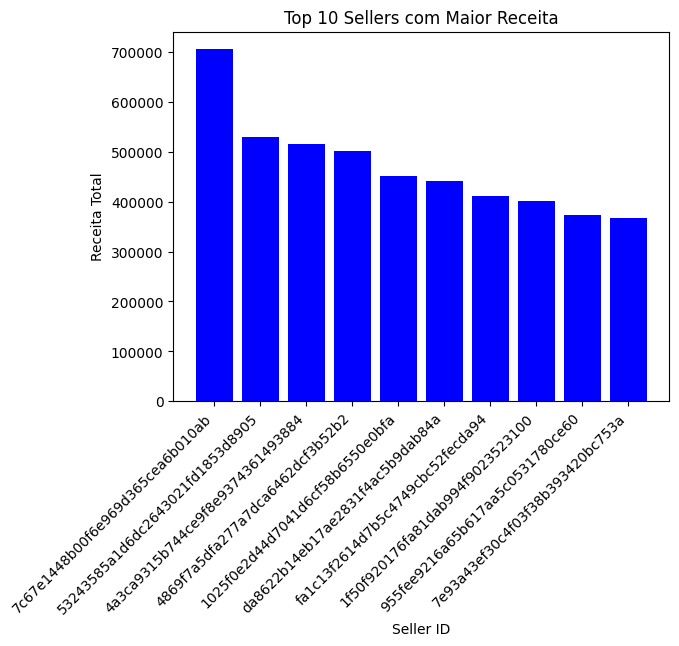

In [ ]:
plt.bar(top_10_sellers['seller_id'], top_10_sellers['total_receita'], color='blue')
plt.title('Top 10 Sellers com Maior Receita')
plt.xlabel('Seller ID')
plt.ylabel('Receita Total')
plt.xticks(rotation=45, ha='right')
plt.show()

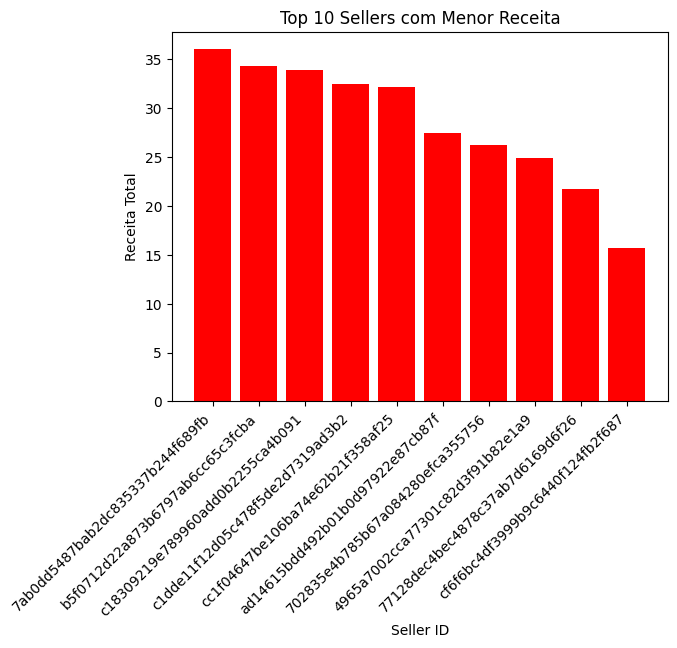

In [ ]:
plt.bar(pior_10_sellers['seller_id'], pior_10_sellers['total_receita'], color='red')
plt.title('Top 10 Sellers com Menor Receita')
plt.xlabel('Seller ID')
plt.ylabel('Receita Total')
plt.xticks(rotation=45, ha='right')

plt.show()

# Identificando a inflação e a sua variação


In [ ]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
dtype: object

In [ ]:
orders['year_month'] = orders['order_purchase_timestamp'].dt.to_period('M')
orders

In [ ]:
merge_da_data = pd.merge(orders, order_items, on='order_id')

In [ ]:
media_precos = merge_da_data.groupby('year_month')['price'].mean()

In [ ]:
preco_inicial = media_precos.iloc[0]

In [ ]:
preco_final = media_precos.iloc[-1]

In [ ]:
porcentage_variacao = ((preco_final - preco_inicial) / preco_inicial) * 100

In [ ]:
variacao_absoluta = preco_final - preco_inicial

In [ ]:
print("Preço médio inicial:", preco_inicial)
print("Preço médio final:", preco_final)
print("Variação percentual: {:.2f}%".format(porcentage_variacao))
print("Variação em valor absoluto:", variacao_absoluta, "R$")

Preço médio inicial: 44.56
Preço médio final: 145.0
Variação percentual: 225.40%
Variação em valor absoluto: 100.44 R$


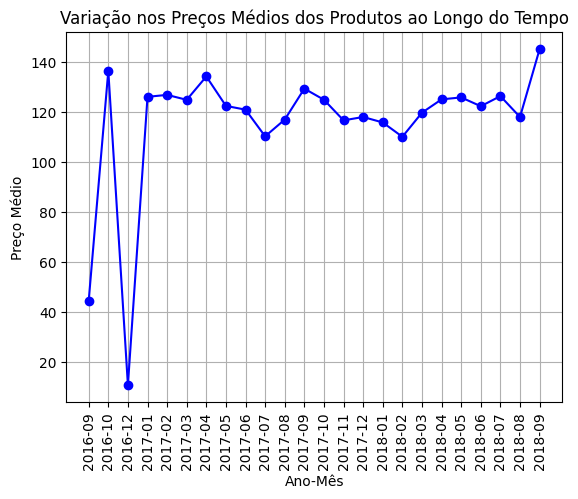

In [ ]:
plt.plot(average_prices.index.astype(str), average_prices.values, marker='o', color='blue')
plt.title('Variação nos Preços Médios dos Produtos ao Longo do Tempo')
plt.xlabel('Ano-Mês')
plt.ylabel('Preço Médio')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Melhores sellers (vendedores) por Avaliação

In [ ]:
# juntando as tabelas com a identidade dos vendedores com a de avaliação
avaliacao_de_vendedores = reviews.groupby('order_id')['review_score'].mean().reset_index()

In [ ]:
# definindo um criterio de avaliação
limiar_boas = 4
limiar_ruins = 2

In [ ]:
# filtrando vendedores
top_10_melhores = avaliacao_de_vendedores[avaliacao_de_vendedores['review_score'] >= limiar_boas].nlargest(10, 'review_score')

In [ ]:
top_10_piores = avaliacao_de_vendedores[avaliacao_de_vendedores['review_score'] <= limiar_ruins].nsmallest(10, 'review_score')

In [ ]:
print("Top 10 Melhores Sellers:")
print(top_10_melhores)

Top 10 Melhores Sellers:
                            order_id  review_score
0   00010242fe8c5a6d1ba2dd792cb16214           5.0
2   000229ec398224ef6ca0657da4fc703e           5.0
4   00042b26cf59d7ce69dfabb4e55b4fd9           5.0
7   000576fe39319847cbb9d288c5617fa6           5.0
10  00061f2a7bc09da83e415a52dc8a4af1           5.0
11  00063b381e2406b52ad429470734ebd5           5.0
12  0006ec9db01a64e59a68b2c340bf65a7           5.0
13  0008288aa423d2a3f00fcb17cd7d8719           5.0
14  0009792311464db532ff765bf7b182ae           5.0
17  000c3e6612759851cc3cbb4b83257986           5.0


In [ ]:
print("\nTop 10 Piores Sellers:")
print(top_10_piores)


Top 10 Piores Sellers:
                            order_id  review_score
8   0005a1a1728c9d785b8e2b08b904576c           1.0
16  000aed2e25dbad2f9ddb70584c5a2ded           1.0
24  0010dedd556712d7bb69a19cb7bbd37a           1.0
34  00169e31ef4b29deaae414f9a5e95929           1.0
36  0017afd5076e074a48f1f1a4c7bac9c5           1.0
43  001d8f0e34a38c37f7dba2a37d4eba8b           1.0
47  001e7cf2ad6bef3ade12ebc56ceaf0f3           1.0
74  0030d783f979fbc5981e75613b057344           1.0
76  00310b0c75bb13015ec4d82d341865a4           1.0
78  0032d07457ae9c806c79368d7d9ce96b           1.0


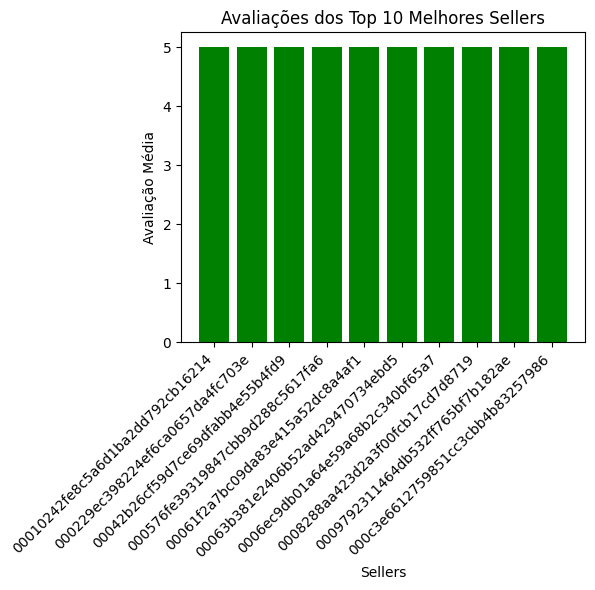

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.bar(top_10_melhores['order_id'], top_10_melhores['review_score'], color='green')
ax.set_title('Avaliações dos Top 10 Melhores Sellers')
ax.set_xlabel('Sellers')
ax.set_ylabel('Avaliação Média')
ax.set_xticks(top_10_melhores['order_id'])
ax.set_xticklabels(top_10_melhores['order_id'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

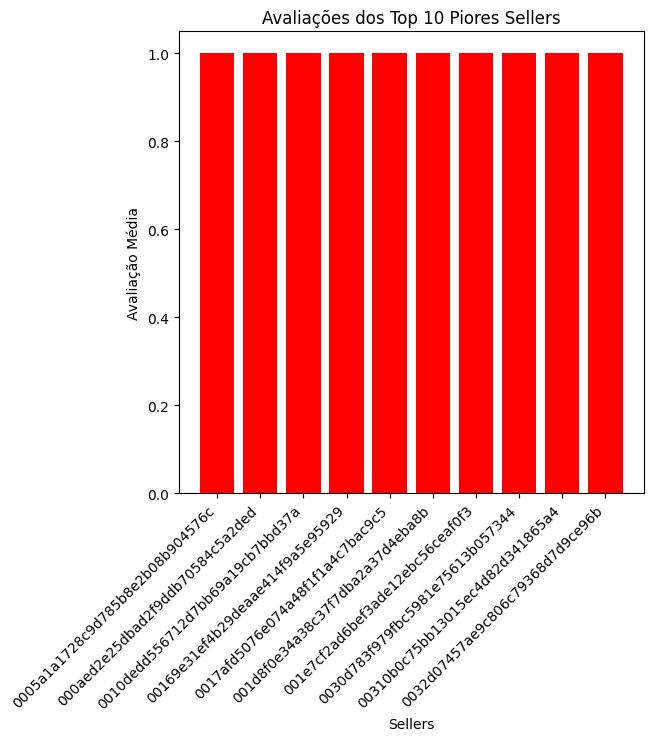

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.bar(top_10_piores['order_id'], top_10_piores['review_score'], color='red')
ax.set_title('Avaliações dos Top 10 Piores Sellers')
ax.set_xlabel('Sellers')
ax.set_ylabel('Avaliação Média')
ax.set_xticks(top_10_piores['order_id'])
ax.set_xticklabels(top_10_piores['order_id'], rotation=45, ha='right')
plt.show()

# Topico Livre

trouxe um topico de volume de venda por regiao
e outro de volume de vendas mensal e sua variação

In [6]:
merge_regiao = pd.merge(orders, customers, on='customer_id')

In [7]:
venda_por_regiao = merge_regiao.groupby('customer_state').size().reset_index(name='volume_de_vendas')

In [25]:
venda_por_regiao.describe()

,volume_de_vendas
count,27.000000
mean,3683.000000
std,8270.437664
min,46.000000
25%,381.500000
50%,907.000000
75%,2760.000000
max,41746.000000


In [ ]:
print("Volume de Vendas por Estado:")
print(venda_por_regiao)

Volume de Vendas por Estado:
   customer_state  volume_de_vendas
0              AC                81
1              AL               413
2              AM               148
3              AP                68
4              BA              3380
5              CE              1336
6              DF              2140
7              ES              2033
8              GO              2020
9              MA               747
10             MG             11635
11             MS               715
12             MT               907
13             PA               975
14             PB               536
15             PE              1652
16             PI               495
17             PR              5045
18             RJ             12852
19             RN               485
20             RO               253
21             RR                46
22             RS              5466
23             SC              3637
24             SE               350
25             SP             41746

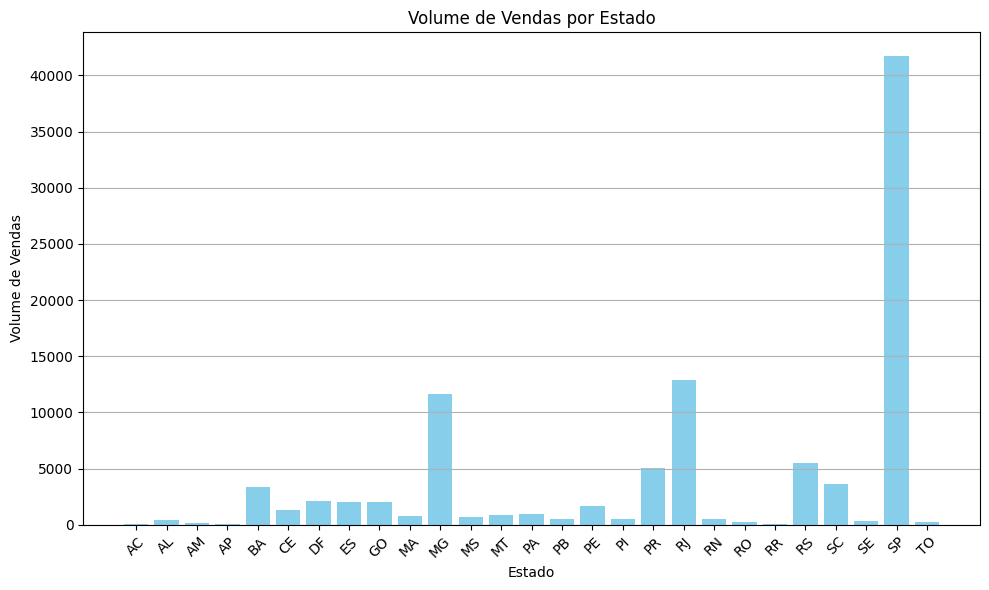

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(venda_por_regiao['customer_state'], venda_por_regiao['volume_de_vendas'], color='skyblue')
plt.title('Volume de Vendas por Estado')
plt.xlabel('Estado')
plt.ylabel('Volume de Vendas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

In [ ]:
orders['month'] = orders['order_purchase_timestamp'].dt.to_period('M')

In [ ]:
venda_mensal = orders.groupby('month').size().reset_index(name='total_vendas')

In [ ]:
# exibindo o total de vendas por mes
print("Total de Vendas por Mês:")
print(venda_mensal)

Total de Vendas por Mês:
      month  total_vendas
0   2016-09             4
1   2016-10           324
2   2016-12             1
3   2017-01           800
4   2017-02          1780
5   2017-03          2682
6   2017-04          2404
7   2017-05          3700
8   2017-06          3245
9   2017-07          4026
10  2017-08          4331
11  2017-09          4285
12  2017-10          4631
13  2017-11          7544
14  2017-12          5673
15  2018-01          7269
16  2018-02          6728
17  2018-03          7211
18  2018-04          6939
19  2018-05          6873
20  2018-06          6167
21  2018-07          6292
22  2018-08          6512
23  2018-09            16
24  2018-10             4


In [ ]:
# convertento para visualizar no grafico
venda_mensal['month'] = venda_mensal['month'].astype(str)

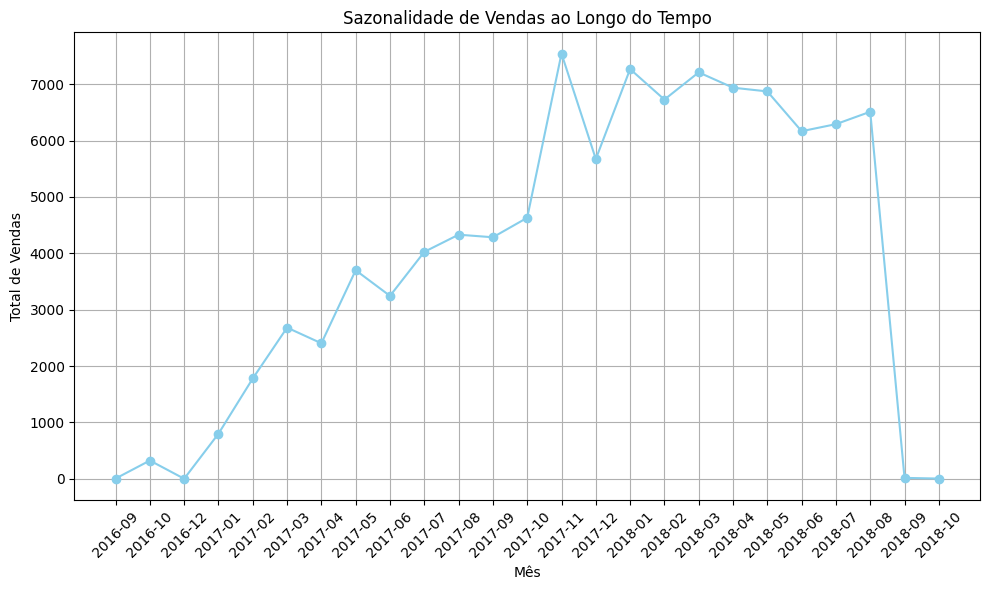

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(venda_mensal['month'], venda_mensal['total_vendas'], marker='o', color='skyblue', linestyle='-')
plt.title('Sazonalidade de Vendas ao Longo do Tempo')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()